# **Movie Recommender System**
We use the TMDB 5000 movie dataset on [this link](https://www.kaggle.com/tmdb/tmdb-movie-metadata).

## Mount Google Drive

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
%cd "/content/drive/MyDrive/Colab Notebooks/Pytorch"

/content/drive/MyDrive/Colab Notebooks/Pytorch


## Importing dataset

In [ ]:
import pandas as pd 

movies = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Pytorch/TMDB Dataset/tmdb_5000_movies.csv')
credits = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Pytorch/TMDB Dataset/tmdb_5000_credits.csv')

In [ ]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
movies.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [ ]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
credits.describe()

,movie_id
count,4803.000000
mean,57165.484281
std,88694.614033
min,5.000000
25%,9014.500000
50%,14629.000000
75%,58610.500000
max,459488.000000


As it is clear, the first rows of movies & credits are json. So, we should convert 'genres', 'keywords', 'production_companies', 'cast', 'crew' columns from json to string.
<br/>
To convert it from 'json' to 'string' we do as:

In [ ]:
import json

# convert genres column from json to string
movies['genres'] = movies['genres'].apply(json.loads)
for index,i in zip(movies.index,movies['genres']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name'])) # the key 'name' contains the name of the genre
    movies.loc[index,'genres'] = str(list1)

# convert keywords column from json to string
movies['keywords'] = movies['keywords'].apply(json.loads)
for index,i in zip(movies.index,movies['keywords']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name']))
    movies.loc[index,'keywords'] = str(list1)
    
# convert production_companies column from json to string
movies['production_companies'] = movies['production_companies'].apply(json.loads)
for index,i in zip(movies.index,movies['production_companies']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name']))
    movies.loc[index,'production_companies'] = str(list1)

# convert cast column from json to string
credits['cast'] = credits['cast'].apply(json.loads)
for index,i in zip(credits.index,credits['cast']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name']))
    credits.loc[index,'cast'] = str(list1)

# convert crew column from json to string    
credits['crew'] = credits['crew'].apply(json.loads)
def director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
credits['crew'] = credits['crew'].apply(director)
credits.rename(columns={'crew':'director'},inplace=True)

In [ ]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",http://www.avatarmovie.com/,19995,"['culture clash', 'future', 'space war', 'spac...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"['Ingenious Film Partners', 'Twentieth Century...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"['Adventure', 'Fantasy', 'Action']",http://disney.go.com/disneypictures/pirates/,285,"['ocean', 'drug abuse', 'exotic island', 'east...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"['Walt Disney Pictures', 'Jerry Bruckheimer Fi...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"['Action', 'Adventure', 'Crime']",http://www.sonypictures.com/movies/spectre/,206647,"['spy', 'based on novel', 'secret agent', 'seq...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"['Columbia Pictures', 'Danjaq', 'B24']","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",http://www.thedarkknightrises.com/,49026,"['dc comics', 'crime fighter', 'terrorist', 's...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"['Legendary Pictures', 'Warner Bros.', 'DC Ent...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"['Action', 'Adventure', 'Science Fiction']",http://movies.disney.com/john-carter,49529,"['based on novel', 'mars', 'medallion', 'space...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,['Walt Disney Pictures'],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
movies.iloc[4]

budget                                                          260000000
genres                         ['Action', 'Adventure', 'Science Fiction']
homepage                             http://movies.disney.com/john-carter
id                                                                  49529
keywords                ['based on novel', 'mars', 'medallion', 'space...
original_language                                                      en
original_title                                                John Carter
overview                John Carter is a war-weary, former military ca...
popularity                                                         43.927
production_companies                             ['Walt Disney Pictures']
production_countries    [{"iso_3166_1": "US", "name": "United States o...
release_date                                                   2012-03-07
revenue                                                         284139100
runtime                               

Mergeing 2 csv file and keep required columns.

In [ ]:
movies = movies.merge(credits,left_on='id',right_on='movie_id',how='left')
movies = movies[['id','original_title','genres','cast','vote_average','director','keywords']]

In [ ]:
movies.head()

,id,original_title,genres,cast,vote_average,director,keywords
0,19995,Avatar,"['Action', 'Adventure', 'Fantasy', 'Science Fi...","['Sam Worthington', 'Zoe Saldana', 'Sigourney ...",7.2,James Cameron,"['culture clash', 'future', 'space war', 'spac..."
1,285,Pirates of the Caribbean: At World's End,"['Adventure', 'Fantasy', 'Action']","['Johnny Depp', 'Orlando Bloom', 'Keira Knight...",6.9,Gore Verbinski,"['ocean', 'drug abuse', 'exotic island', 'east..."
2,206647,Spectre,"['Action', 'Adventure', 'Crime']","['Daniel Craig', 'Christoph Waltz', 'Léa Seydo...",6.3,Sam Mendes,"['spy', 'based on novel', 'secret agent', 'seq..."
3,49026,The Dark Knight Rises,"['Action', 'Crime', 'Drama', 'Thriller']","['Christian Bale', 'Michael Caine', 'Gary Oldm...",7.6,Christopher Nolan,"['dc comics', 'crime fighter', 'terrorist', 's..."
4,49529,John Carter,"['Action', 'Adventure', 'Science Fiction']","['Taylor Kitsch', 'Lynn Collins', 'Samantha Mo...",6.1,Andrew Stanton,"['based on novel', 'mars', 'medallion', 'space..."


In [ ]:
movies.iloc[4]

id                                                            49529
original_title                                          John Carter
genres                   ['Action', 'Adventure', 'Science Fiction']
cast              ['Taylor Kitsch', 'Lynn Collins', 'Samantha Mo...
vote_average                                                    6.1
director                                             Andrew Stanton
keywords          ['based on novel', 'mars', 'medallion', 'space...
Name: 4, dtype: object

## Feature Extraction
<br/>
Now, we should convert 4 columns 'genres', 'cast', 'director', 'keyword' to a binary format(sth like feature extraction) to be able to use it in computing distance of 2movies later.

In [ ]:
def binary_feature_extractor(item_list, itemList):
    binaryList = []
    
    for item in itemList:
        if item in item_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    
    return binaryList

### *Working with genres*

In [ ]:
movies['genres'] = movies['genres'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['genres'] = movies['genres'].str.split(',')

genreList = []
for index, row in movies.iterrows():
    genres = row["genres"]
    
    for genre in genres:
        if genre not in genreList:
            genreList.append(genre)
print(genreList[:10]) #now we have a list with unique genres

movies['genres_bin'] = movies['genres'].apply(lambda x: binary_feature_extractor(x, genreList))
movies['genres_bin'].head()

['Action', 'Adventure', 'Fantasy', 'ScienceFiction', 'Crime', 'Drama', 'Thriller', 'Animation', 'Family', 'Western']


0    [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1    [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2    [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3    [1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
4    [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: genres_bin, dtype: object

### *Working with cast*

In [ ]:
movies['cast'] = movies['cast'].str.strip('[]').str.replace(' ','').str.replace("'",'').str.replace('"','')
movies['cast'] = movies['cast'].str.split(',')

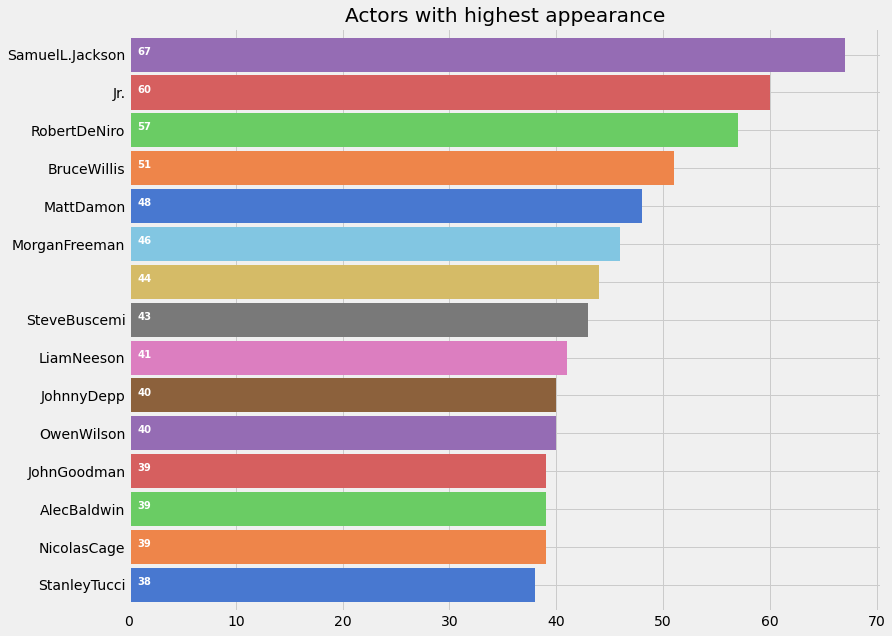

In [ ]:
# To plot the highest cast
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

plt.subplots(figsize=(12,10))
list1=[]
for i in movies['cast']:
    list1.extend(i)
ax=pd.Series(list1).value_counts()[:15].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('muted',40))
for i, v in enumerate(pd.Series(list1).value_counts()[:15].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=10,color='white',weight='bold')
plt.title('Actors with highest appearance')
plt.show()

In [ ]:
for i,j in zip(movies['cast'],movies.index):
    list2 = []
    list2 = i[:4]
    movies.loc[j,'cast'] = str(list2)
movies['cast'] = movies['cast'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['cast'] = movies['cast'].str.split(',')
for i,j in zip(movies['cast'],movies.index):
    list2 = []
    list2 = i
    list2.sort()
    movies.loc[j,'cast'] = str(list2)
movies['cast']=movies['cast'].str.strip('[]').str.replace(' ','').str.replace("'",'')

castList = []
for index, row in movies.iterrows():
    cast = row["cast"]
    for i in cast:
        if i not in castList:
            castList.append(i)

movies['cast_bin'] = movies['cast'].apply(lambda x: binary_feature_extractor(x, castList))
movies['cast_bin'].head()

0    [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1    [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...
2    [0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, ...
3    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, ...
4    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, ...
Name: cast_bin, dtype: object

### *Working with director*

In [ ]:
def xstr(s):
    if s is None:
        return ''
    return str(s)
movies['director'] = movies['director'].apply(xstr)

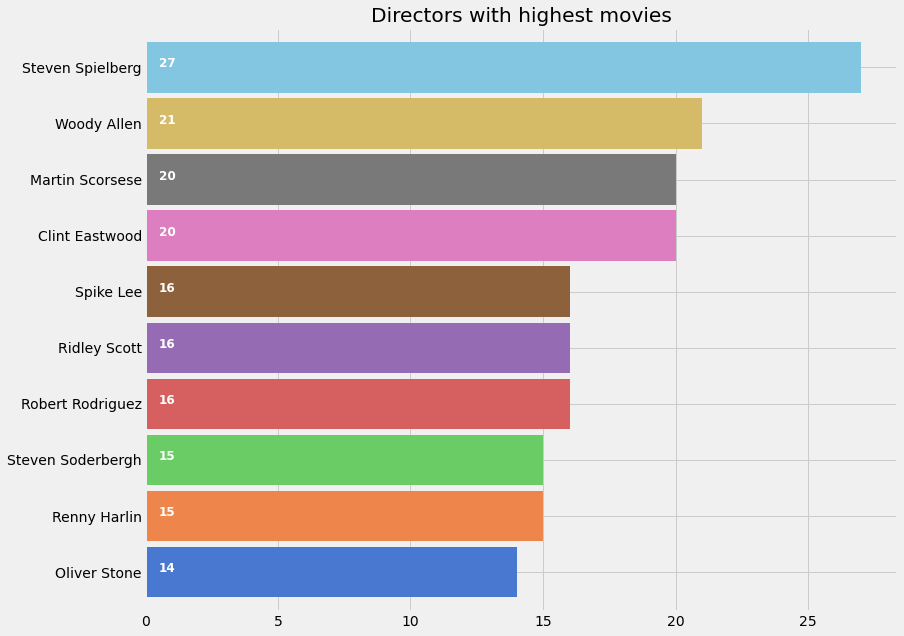

In [ ]:
# To plot the highest director
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

plt.subplots(figsize=(12,10))
ax = movies[movies['director']!=''].director.value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('muted',40))
for i, v in enumerate(movies[movies['director']!=''].director.value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.5, i, v,fontsize=12,color='white',weight='bold')
plt.title('Directors with highest movies')
plt.show()

In [ ]:
directorList=[]
for i in movies['director']:
    if i not in directorList:
        directorList.append(i)

movies['director_bin'] = movies['director'].apply(lambda x: binary_feature_extractor(x, directorList))
movies.head()

,id,original_title,genres,cast,vote_average,director,keywords,cast_bin,genres_bin,director_bin
0,19995,Avatar,"[Action, Adventure, Fantasy, ScienceFiction]",SamW,7.2,James Cameron,"['culture clash', 'future', 'space war', 'spac...","[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]",John,6.9,Gore Verbinski,"['ocean', 'drug abuse', 'exotic island', 'east...","[0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,206647,Spectre,"[Action, Adventure, Crime]",Chri,6.3,Sam Mendes,"['spy', 'based on novel', 'secret agent', 'seq...","[0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, ...","[1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]",Anne,7.6,Christopher Nolan,"['dc comics', 'crime fighter', 'terrorist', 's...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, ...","[1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,49529,John Carter,"[Action, Adventure, ScienceFiction]",Lynn,6.1,Andrew Stanton,"['based on novel', 'mars', 'medallion', 'space...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, ...","[1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


## Similarity between movies

In [ ]:
from scipy import spatial

def similarity(movie1_id, movie2_id):
    m1 = movies.iloc[movie1_id]
    m2 = movies.iloc[movie2_id]
    
    genres_m1 = m1['genres_bin']
    genres_m2 = m2['genres_bin']
    # print(genres_m1)
    # print(genres_m2)
    genre_distance = spatial.distance.cosine(genres_m1, genres_m2)

    cast_m1 = m1['cast_bin']
    cast_m2 = m2['cast_bin']
    # print(cast_m1)
    # print(cast_m2)
    cast_distance = spatial.distance.cosine(cast_m1, cast_m2)

    director_m1 = m1['director_bin']
    director_m2 = m2['director_bin']
    # print(director_m1)
    # print(director_m2)
    director_distance = spatial.distance.cosine(director_m1, director_m2)

    return genre_distance + cast_distance + director_distance

In [ ]:
similarity(4,140) #checking similarity between any 2 random movies

1.8779915320718539

In [ ]:
new_id = list(range(0,movies.shape[0]))
movies['new_id']=new_id
movies=movies[['original_title','genres','vote_average','genres_bin','cast_bin','new_id','director','director_bin']]
movies.head()

,original_title,genres,vote_average,genres_bin,cast_bin,new_id,director,director_bin
0,Avatar,"[Action, Adventure, Fantasy, ScienceFiction]",7.2,"[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,James Cameron,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]",6.9,"[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...",1,Gore Verbinski,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,Spectre,"[Action, Adventure, Crime]",6.3,"[1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, ...",2,Sam Mendes,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]",7.6,"[1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, ...",3,Christopher Nolan,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,John Carter,"[Action, Adventure, ScienceFiction]",6.1,"[1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, ...",4,Andrew Stanton,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


## Recommender function

In [ ]:
import operator

def recommender(name):
  new_movie = movies[movies['original_title'].str.contains(name)].iloc[0].to_frame().T
  print('Selected Movie:')
  print(f"{new_movie.original_title.values[0]}  | Genres: {str(movies.iloc[new_movie.new_id.values[0]][1]).strip('[]').replace(' ','')} | Rating: {str(movies.iloc[new_movie.new_id.values[0]][2])}")

  def getNeighbors(baseMovie, K):
      distances = []
  
      for index, movie in movies.iterrows():
          if movie['new_id'] != baseMovie['new_id'].values[0]:
              dist = similarity(baseMovie['new_id'].values[0], movie['new_id'])
              distances.append((movie['new_id'], dist))
  
      distances.sort(key=operator.itemgetter(1))
      neighbors = []
  
      for x in range(K):
          neighbors.append(distances[x])
      return neighbors

  K = 10
  avgRating = 0
  neighbors = getNeighbors(new_movie, K)
  
  print('\nRecommended Movies: \n')
  for neighbor in neighbors:
      avgRating = avgRating+movies.iloc[neighbor[0]][2]  
      print( movies.iloc[neighbor[0]][0]+" | Genres: "+str(movies.iloc[neighbor[0]][1]).strip('[]').replace(' ','')+" | Rating: "+str(movies.iloc[neighbor[0]][2]))
  
  print('\n')
  avgRating = avgRating/K
  print('The predicted rating for %s is: %f' %(new_movie['original_title'].values[0],avgRating))
  print('The actual rating for %s is %f' %(new_movie['original_title'].values[0],new_movie['vote_average']))


In [ ]:
recommender("Godfather")

print("\n\n~.~.~.~.~.~.~.~.~.~.~.~.\n\n")

recommender("The Post")

Selected Movie:
The Godfather: Part III  | Genres: 'Crime','Drama','Thriller' | Rating: 7.1


/usr/local/lib/python3.7/dist-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)



Recommended Movies: 

The Godfather: Part II | Genres: 'Drama','Crime' | Rating: 8.3
The Godfather | Genres: 'Drama','Crime' | Rating: 8.4
The Rainmaker | Genres: 'Drama','Crime','Thriller' | Rating: 6.7
Donnie Brasco | Genres: 'Crime','Drama','Thriller' | Rating: 7.4
Glengarry Glen Ross | Genres: 'Crime','Drama','Mystery' | Rating: 7.5
Sexy Beast | Genres: 'Crime','Drama','Thriller' | Rating: 7.0
Whip It | Genres: 'Drama' | Rating: 6.7
New York Stories | Genres: 'Comedy','Drama','Romance' | Rating: 6.2
Knockaround Guys | Genres: 'Crime','Thriller' | Rating: 5.9
A Mighty Heart | Genres: 'Drama','Thriller' | Rating: 6.7


The predicted rating for The Godfather: Part III is: 7.080000
The actual rating for The Godfather: Part III is 7.100000


~.~.~.~.~.~.~.~.~.~.~.~.


Selected Movie:
The Postman  | Genres: 'Drama','Adventure' | Rating: 6.1

Recommended Movies: 

Open Range | Genres: 'Western' | Rating: 7.0
La Guerre du feu | Genres: 'Adventure','Drama' | Rating: 7.1
Not Easily Broken |